Syed Muhammad Rimmel Asghar 

20B-005-SE

Sec - A

# EDA 

Importing all the required Libraries.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
## reading file.
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Preprocessing.

we check the Null data in the given dataset.

In [3]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

taking a look at the summary of the DataSet.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [89]:
#these are All the columns that contains object type columns.
columns_with_object = [col for col in df.columns if df[col].dtype == 'object']
columns_with_object

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

## Cleaning 

In [6]:
df.shape

(19237, 18)

In [7]:
print(f'This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')

This DataSet Contains 19237 rows & 18 columns.


In [8]:
# dropping duplicates

newdf  = df.drop_duplicates(keep = False)

In [9]:
print(f'After Dropping Duplicates we got {newdf.shape[0]} rows.')

After Dropping Duplicates we got 18704 rows.


In [10]:
newdf.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [11]:
newdf.Levy.head(10)

0     1399
2        -
3      862
4      446
5      891
6      761
7      751
8      394
9        -
10    1053
Name: Levy, dtype: object

It is observed that Levy column the DataSet contains '-' symbol insted of a int variable.

So we will replace '-' symbol with a '0' and change the datatype of this column to integer type.

In [12]:
newdf.Levy = newdf.Levy.str.replace('-',"0") 

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
newdf.Levy.head()

0    1399
2       0
3     862
4     446
5     891
Name: Levy, dtype: object

see now row index 2 contains 0 instead of a '-' symbol.

In [14]:
newdf['Levy'].dtype

dtype('O')

In [15]:
newdf.Levy = newdf['Levy'].astype('int64')

In [16]:
newdf.Levy.head()

0    1399
2       0
3     862
4     446
5     891
Name: Levy, dtype: int64

The data type of this column is now changed.
now we have also observed that mileage columns contains something fishy.
it contains 'km' which makes it a categorical variable.

In [17]:
newdf.Mileage.head()

0    186005 km
2    200000 km
3    168966 km
4     91901 km
5    160931 km
Name: Mileage, dtype: object

In [18]:
newdf.Mileage = newdf.Mileage.apply(lambda x : str(x).replace("km"," "))
newdf.Mileage = newdf.Mileage.apply(lambda x : int(x))
newdf.Mileage.dtype

dtype('int64')

In [19]:
newdf.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [20]:
newdf.Doors = newdf.Doors.apply(lambda x : str(x).replace("04-May","4-5"))
newdf.Doors = newdf.Doors.apply(lambda x : str(x).replace("02-Mar","2-3"))

In [21]:
newdf['Engine volume'].unique()

array(['3.5', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '3', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '4.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo',
       '2.6', '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo',
       '5.7', '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

Removing of "Turbo" in Engine Column.

In [22]:
newdf['Engine volume'] = newdf['Engine volume'].apply(lambda x : str(x).replace("Turbo"," "))
newdf['Engine volume'] = newdf['Engine volume'].apply(lambda x : float(x))

C:\Users\abc\AppData\Local\Temp/ipykernel_12944/3248038363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Engine volume'] = newdf['Engine volume'].apply(lambda x : str(x).replace("Turbo"," "))
C:\Users\abc\AppData\Local\Temp/ipykernel_12944/3248038363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Engine volume'] = newdf['Engine volume'].apply(lambda x : float(x))


In [23]:
newdf.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4-5,Left wheel,White,4


In [24]:
newdf.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

# Exploratory Data Analysis.

### 1. Lets Analyse the fuel type used in different Cars.

In [25]:
# no of unique fuel types.
newdf['Fuel type'].nunique()

7

In [26]:
newdf.groupby(['Fuel type']).size().sort_values(ascending = False)

Fuel type
Petrol            9803
Diesel            3971
Hybrid            3507
LPG                878
CNG                460
Plug-in Hybrid      84
Hydrogen             1
dtype: int64

In [27]:
fuelcounts = newdf['Fuel type'].value_counts()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
C:\Users\abc\AppData\Local\Temp/ipykernel_12944/2944511622.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(fuelcounts.index ,rotation=45)
C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


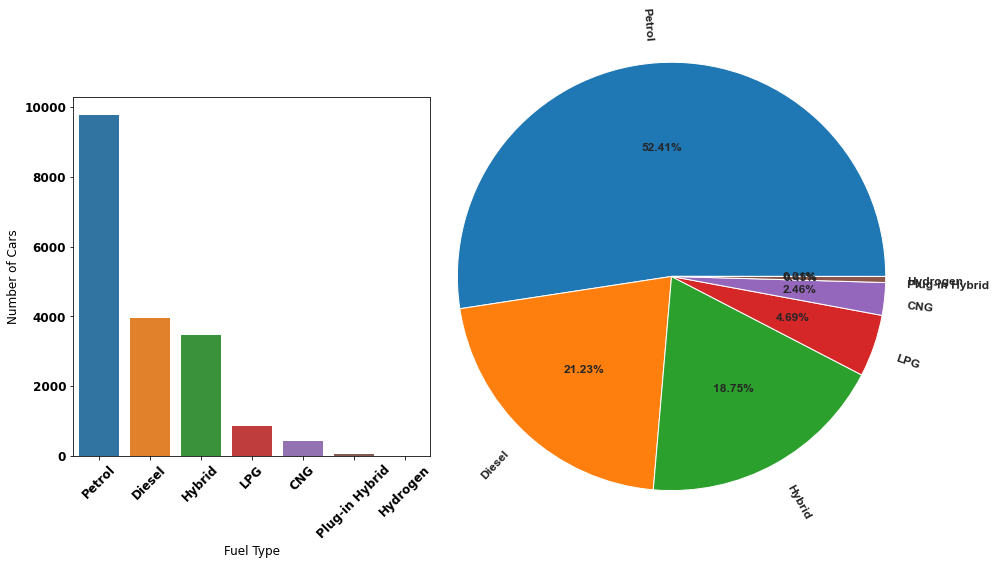

In [28]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
langs= fuelcounts.index
fig, axes = plt.subplots(1,2, figsize=(12,6))
plt.tight_layout(pad=2)
sns.set_style("darkgrid")
axes[0].set_xticklabels(fuelcounts.index ,rotation=45)
a1=sns.barplot(fuelcounts.index,fuelcounts,ax=axes[0]);
a1.set(xlabel='Fuel Type', ylabel='Number of Cars')
plt.pie(fuelcounts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 ,   rotatelabels=True)
plt.show()

### 2. Lets Examine does the car Contains Leather Interior. 

In [29]:
car_that_contains_leather = df['Leather interior'].value_counts()
car_that_contains_leather

Yes    13954
No      5283
Name: Leather interior, dtype: int64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


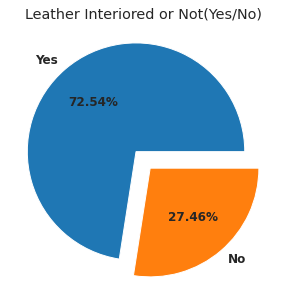

In [30]:
leather_Interior = ['Yes','No']
plt.figure(figsize=(6,5))
plt.rc('font', **font)
plt.title('Leather Interiored or Not(Yes/No)')
plt.pie(car_that_contains_leather,autopct='%1.2f%%',labels = leather_Interior,explode=(0.1,0.1));
plt.show()

## 3.Analysis of Gear Box

In [31]:
gearbox =  df['Gear box type'].value_counts().head(4)
gearbox

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

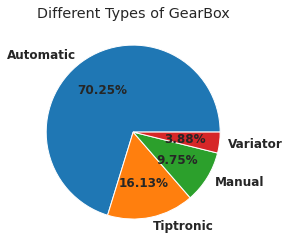

In [36]:
plt.pie(x = gearbox.values,labels = gearbox.index,autopct = '%1.2f%%')
plt.title('Different Types of GearBox')
plt.show()

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


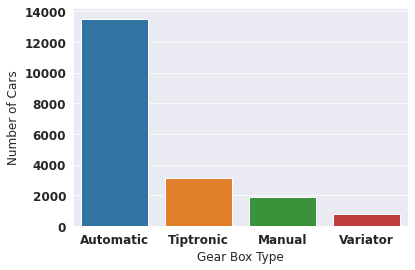

In [43]:
langs= ['Automatic','Tiptronic','Manual','Variator']
plt.rc('font', **font)
plt.tight_layout(pad=2)
sns.barplot(gearbox.index,gearbox);
plt.xlabel('Gear Box Type')
plt.ylabel('Number of Cars')
plt.show()

## 4.Analyse of Manufacturer

In [47]:
Manufacture = newdf.Manufacturer.value_counts().head(20)
Manufacture

HYUNDAI          3690
TOYOTA           3563
MERCEDES-BENZ    2019
FORD             1075
BMW              1027
CHEVROLET        1026
HONDA             949
LEXUS             903
NISSAN            636
VOLKSWAGEN        566
SSANGYONG         437
KIA               413
OPEL              395
MITSUBISHI        287
SUBARU            273
AUDI              253
MAZDA             173
JEEP              138
DAEWOO             91
DODGE              89
Name: Manufacturer, dtype: int64

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


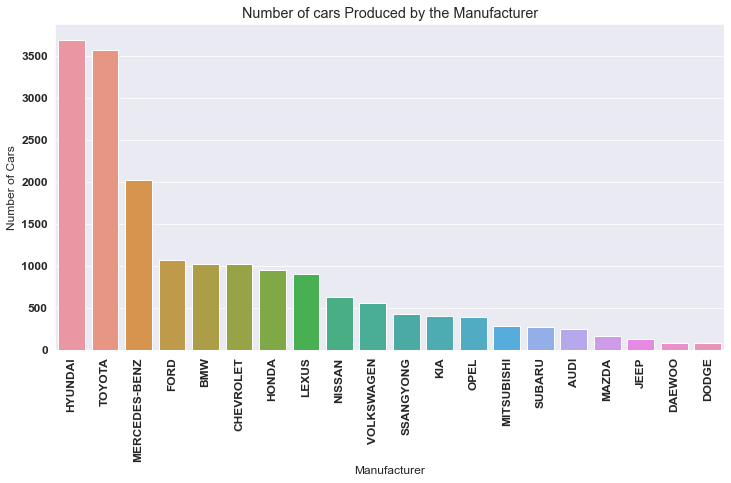

In [48]:
plt.figure(figsize=(12,6))
plt.tight_layout(pad=2)
plt.title("Number of cars Produced by the Manufacturer")
sns.set_style("darkgrid")
a=sns.barplot(Manufacture.index,Manufacture);
a.set_xticklabels(Manufacture.index ,rotation=90)
a.set(xlabel='Manufacturer', ylabel='Number of Cars')
plt.show()

## 5.Analyse on car categories

In [49]:
Car_category = newdf.Category.value_counts()
Car_category

Sedan          8492
Jeep           5315
Hatchback      2771
Minivan         627
Coupe           524
Universal       358
Microbus        296
Goods wagon     226
Pickup           50
Cabriolet        34
Limousine        11
Name: Category, dtype: int64

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


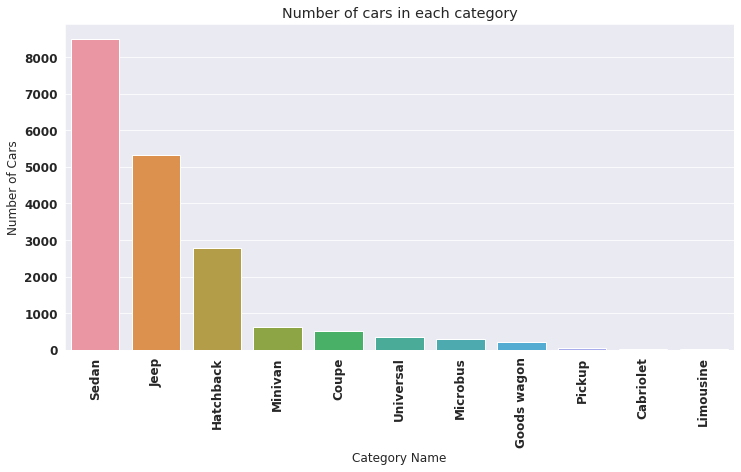

In [50]:
plt.figure(figsize=(12,6))
plt.tight_layout(pad=2)
plt.rc('font', **font)
plt.title('Number of cars in each category')
sns.set_style("darkgrid")
a=sns.barplot(Car_category.index,Car_category);
a.set_xticklabels(Car_category.index ,rotation=90)
a.set(xlabel='Category Name', ylabel='Number of Cars')
plt.show()

## 6. Analysis On Yearly Car Production

In [102]:
yearly_production = newdf.groupby(['Prod. year']).size().reset_index().rename(columns = {0:'Counts'})

In [110]:
yearly_production.head()

,Prod. year,Counts
0,1939,3
1,1943,1
2,1947,1
3,1953,4
4,1957,1


C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



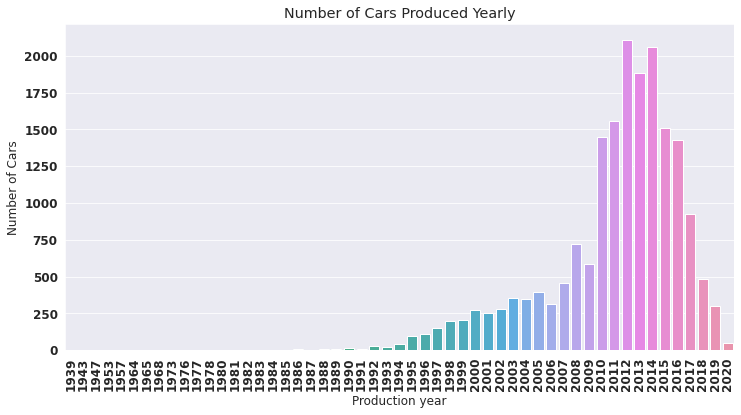

In [107]:
plt.figure(figsize=(12,6))
plt.tight_layout(pad=2)
plt.rc('font', **font)
plt.title('Number of Cars Produced Yearly')
sns.set_style("darkgrid")
a1=sns.barplot('Prod. year','Counts',data = yearly_production );
a1.set_xticklabels(yearly_production['Prod. year'],rotation=90)
a1.set(xlabel='Production year', ylabel='Number of Cars')
plt.show()

## 7.  Analysis of Engine Volume

In [111]:
Engine_vol = newdf.groupby(['Engine volume']).size().reset_index().rename(columns = {0:'Counts'})

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



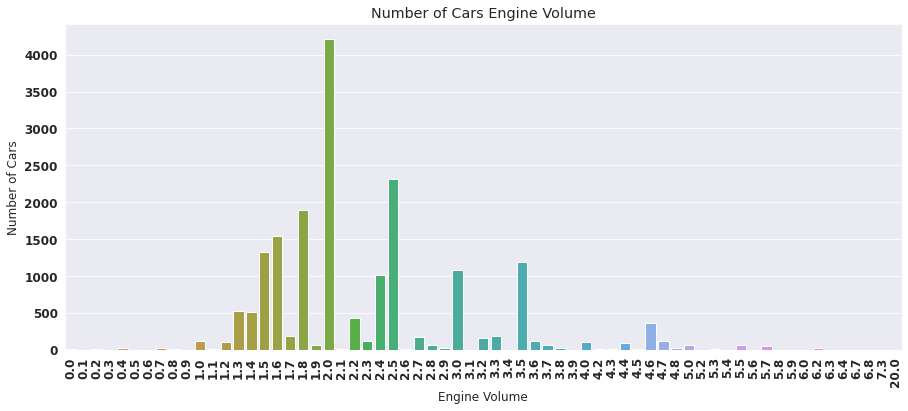

In [114]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.rc('font', **font)
plt.title('Number of Cars Engine Volume')
sns.set_style("darkgrid")
a1=sns.barplot(Engine_vol['Engine volume'],Engine_vol['Counts']);
a1.set_xticklabels(Engine_vol['Engine volume'] ,rotation=90)
a1.set(xlabel='Engine Volume', ylabel='Number of Cars')
plt.show()

## 8.Analysis of Cylinder

In [115]:
Cylinder = newdf.groupby(['Cylinders']).size().reset_index().rename(columns = {0:'Counts'})

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



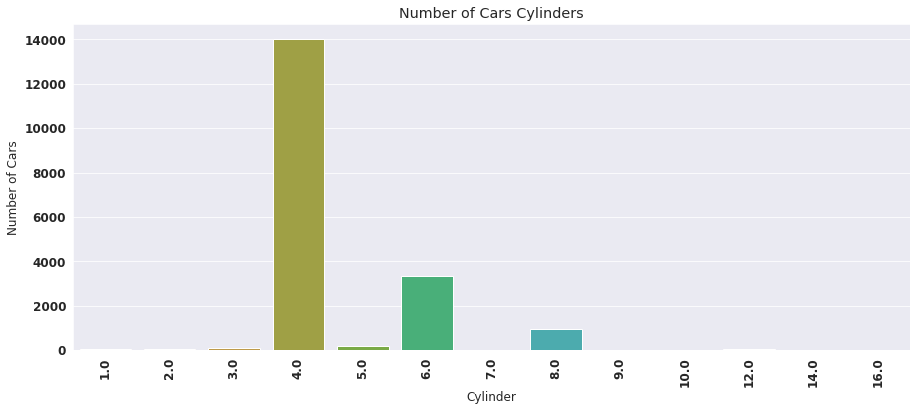

In [116]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.rc('font', **font)
plt.title('Number of Cars Cylinders')
sns.set_style("darkgrid")
a1=sns.barplot(Cylinder.Cylinders,Cylinder.Counts);
a1.set_xticklabels(Cylinder.Cylinders ,rotation=90)
a1.set(xlabel='Cylinder', ylabel='Number of Cars')
plt.show()

##  9.Analysis of Mileage

In [57]:
mileage =  newdf.Mileage.value_counts().head(25)
mileage

0         712
200000    179
150000    157
160000    120
180000    116
100000    102
170000     99
120000     98
1000       98
130000     83
111111     80
140000     71
190000     68
300000     67
250000     67
145000     63
110000     61
80000      60
220000     59
240000     59
90000      58
135000     55
112000     53
125000     52
95000      50
Name: Mileage, dtype: int64

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


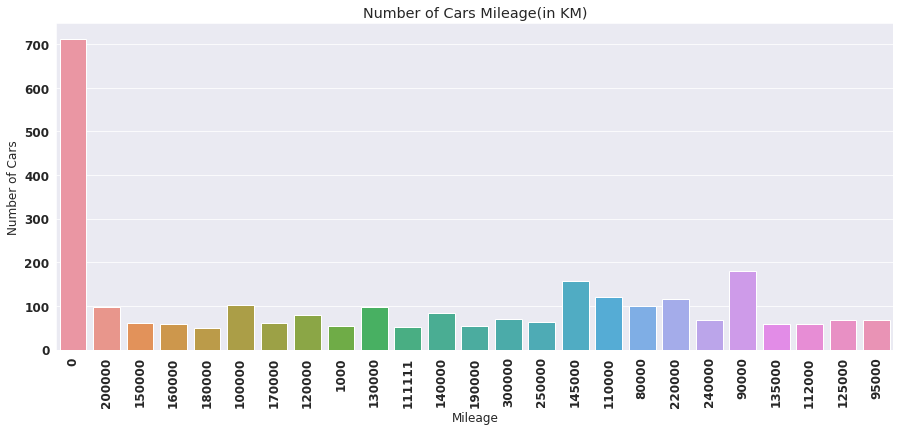

In [58]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.rc('font', **font)
plt.title('Number of Cars Mileage(in KM)')
sns.set_style("darkgrid")
a1=sns.barplot(mileage.index,mileage);
a1.set_xticklabels(mileage.index ,rotation=90)
a1.set(xlabel='Mileage', ylabel='Number of Cars')
plt.show()

It is observed that most of the cars are on a 0 mileage.

## 10. Analysis of Airbag

In [117]:
Airbag = newdf.groupby(['Airbags']).size().reset_index().rename(columns = {0:'Counts'})

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



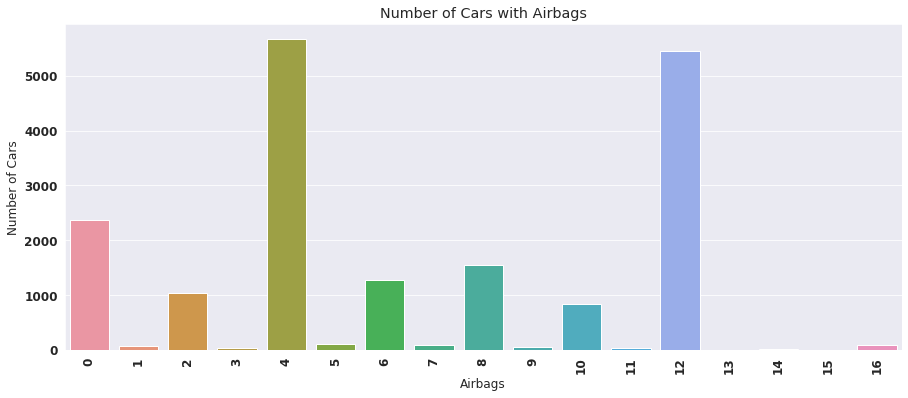

In [118]:
plt.figure(figsize=(15,6))
plt.tight_layout(pad=2)
plt.rc('font', **font)
plt.title('Number of Cars with Airbags')
sns.set_style("darkgrid")
a1=sns.barplot(Airbag.Airbags,Airbag.Counts);
a1.set_xticklabels(Airbag['Airbags'] ,rotation=90)
a1.set(xlabel='Airbags', ylabel='Number of Cars')
plt.show()

## 11. Factor Affecting Price

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


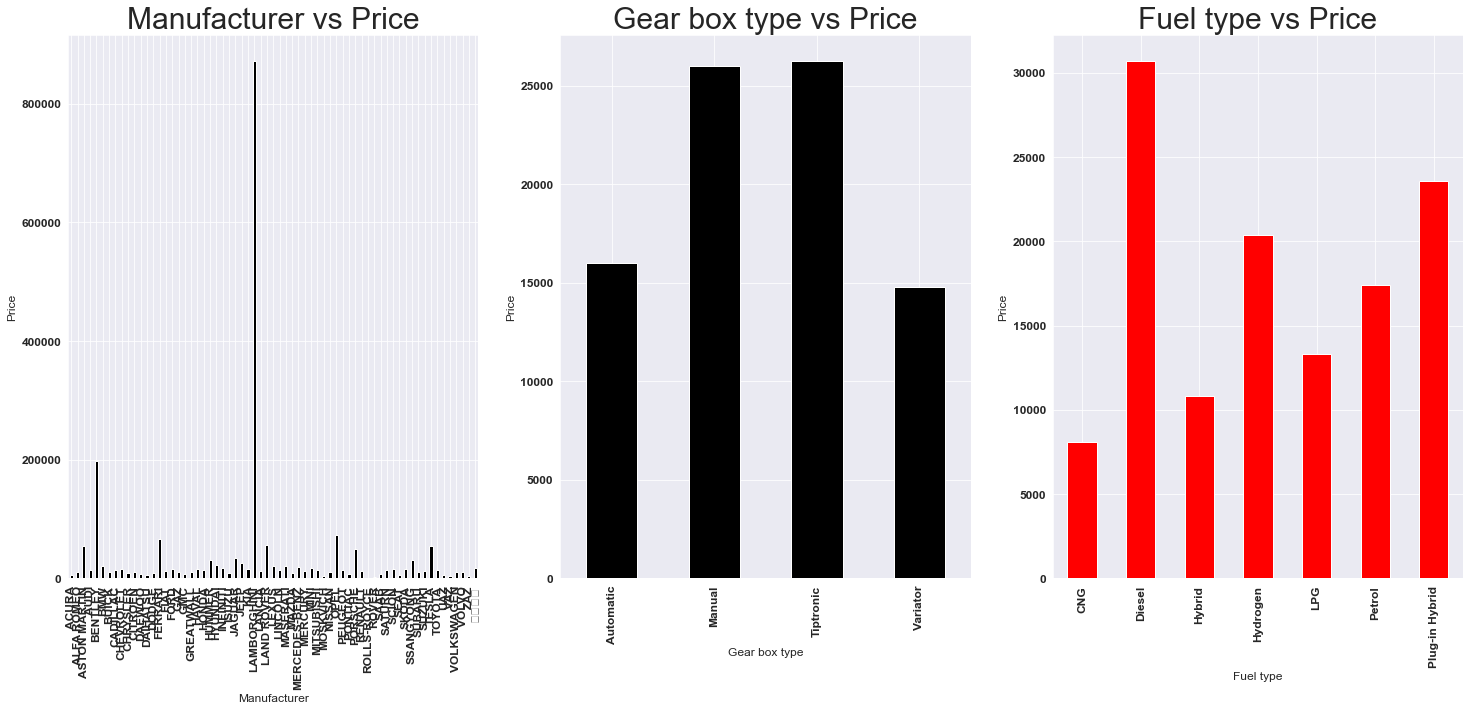

In [74]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Manufacturer vs Price',fontsize = 30)
plt.ylabel("Price")
newdf.groupby('Manufacturer')['Price'].mean().plot.bar(color = 'black')
plt.subplot(132)
plt.title('Gear box type vs Price',fontsize = 30)
plt.ylabel("Price")
newdf.groupby('Gear box type')['Price'].mean().plot.bar(color = 'black')
plt.subplot(133)
plt.title('Fuel type vs Price',fontsize = 30)
plt.ylabel("Price")
newdf.groupby('Fuel type')['Price'].mean().plot.bar(color = 'red')
plt.show()

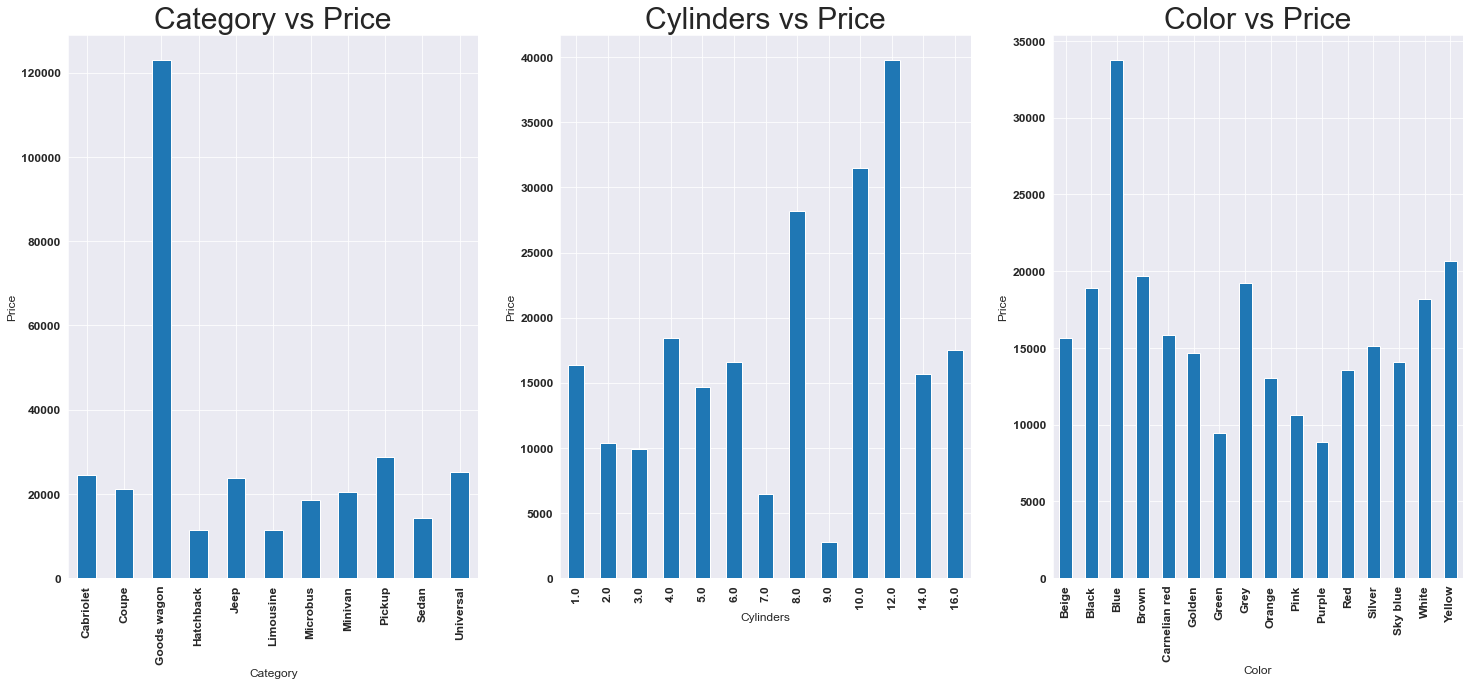

In [71]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Category vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Category')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Cylinders vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Cylinders')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Color vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Color')['Price'].mean().plot.bar()
plt.show()

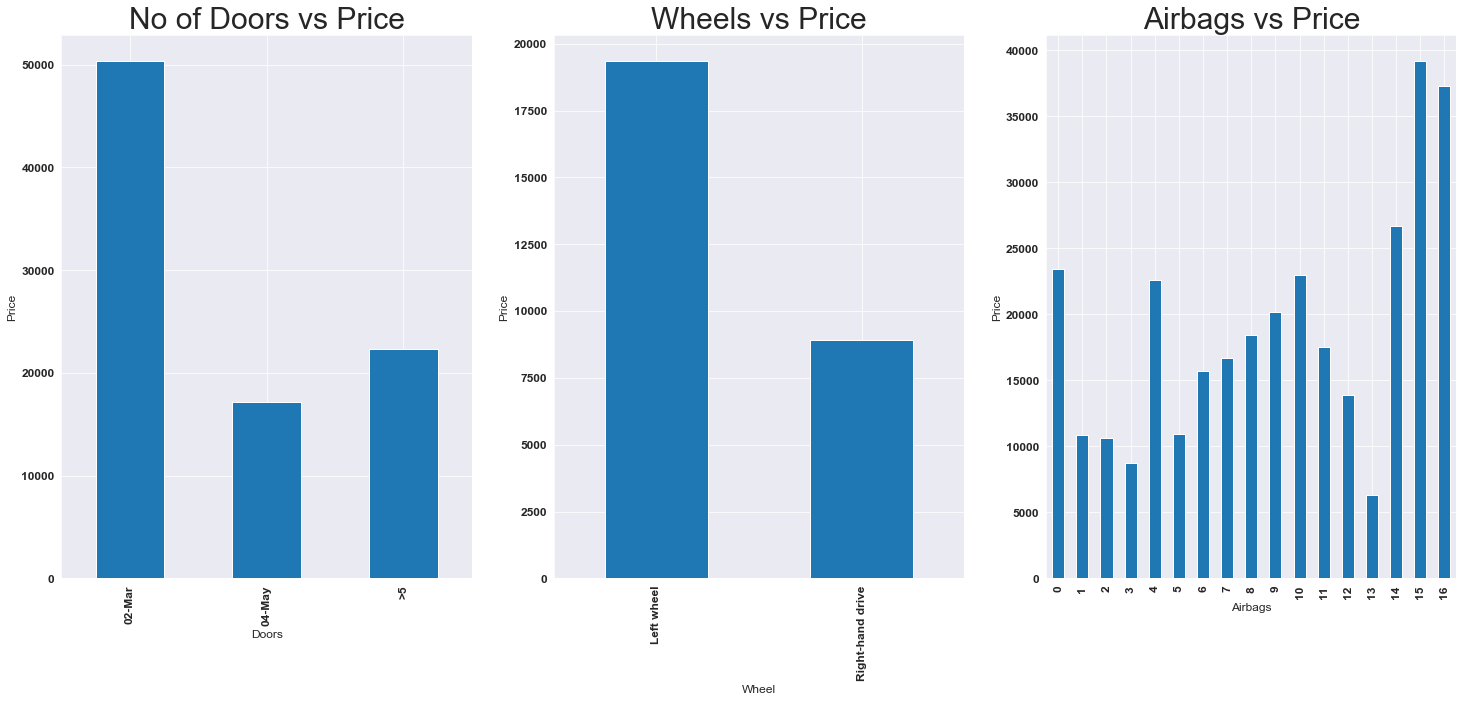

In [72]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('No of Doors vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Doors')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Wheels vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Wheel')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Airbags vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Airbags')['Price'].mean().plot.bar()
plt.show()

<AxesSubplot:>

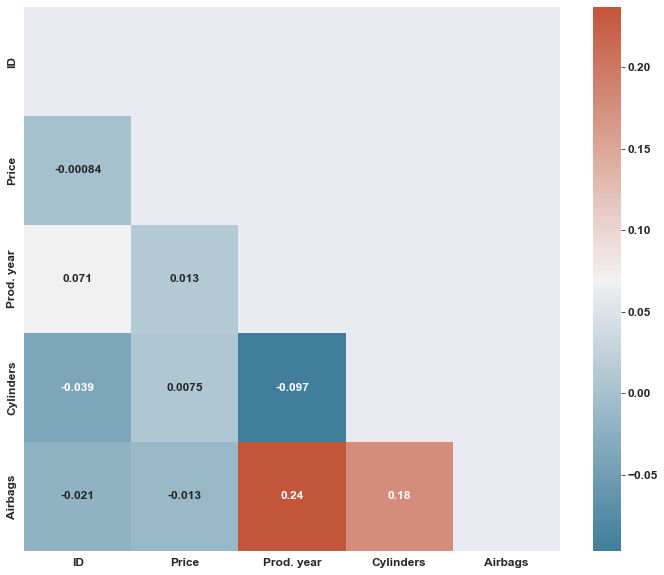

In [75]:

corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# 12. Analysis of Popularity of Manufacture.

In [130]:
ax2= px.treemap(newdf,path=["Manufacturer"],title="Popularity of the Popular Manufacturer:")
ax2.show()

From the above tree map it is observed that Hyundai and Toyota are the most famous and Popular Manufacture.

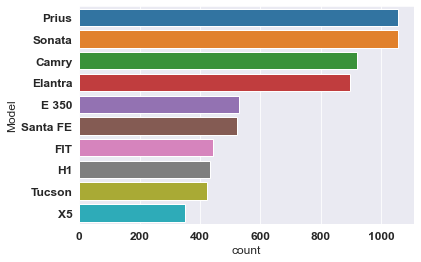

In [85]:
sns.countplot(y ='Model',data = newdf,order=df.Model.value_counts().iloc[:10].index )
plt.show()

In [88]:
models = newdf.Model.value_counts().head(2)
models

Sonata    1056
Prius     1055
Name: Model, dtype: int64

it is observed that Hyudai Sonata was the highest selling car.